In [302]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

ldl

hdl 

tch - 전체 콜레스테롤/hdl

ltg - 혈장 단백질 중 하나

glu - 혈당


s6 빼고 다른 걸로 예측

## 이진분류 모델 구현
- 대상 : 당뇨병 데이터
- 분류 기준 : 당뇨병 환자 / 아닌 사람
- 입력 데이터 : 혈당을 제외한 데이터 중 선택

EDA 작성

In [303]:
dia = load_diabetes()

In [304]:
x_df = pd.DataFrame(dia.data,columns=dia['feature_names'])
x_df.drop('s6',axis=1,inplace=True)

EDA

In [305]:
x_df.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332


In [306]:
y_ori = dia['target']

무엇을 기준으로 나눈건지 설명 예:링크

In [307]:
y = y_ori >= 126

train test 분리 설명

In [308]:
X_train, x_test, y_train, y_test = train_test_split(x_df,y,random_state=12345,test_size=0.2,shuffle=True)

파라미터가 어떤건지 작성
나머지는 기본값이라고 설명

In [309]:
dt = RandomForestClassifier(random_state=12345, n_estimators=1000)
dt

RandomForestClassifier(n_estimators=1000, random_state=12345)

In [310]:
dt.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=12345)

정확도 설명

In [311]:
# 과적합
dt.score(X_train,y_train)

1.0

In [312]:
dt.score(x_test,y_test)

0.651685393258427

---

feature_importance 는 ~하고 도표 첨부

시간이 있으면 개선 후 설명

In [313]:
dt.feature_importances_

array([0.08098564, 0.02760567, 0.18281879, 0.10287162, 0.08891076,
       0.09553147, 0.12932328, 0.06922022, 0.22273255])

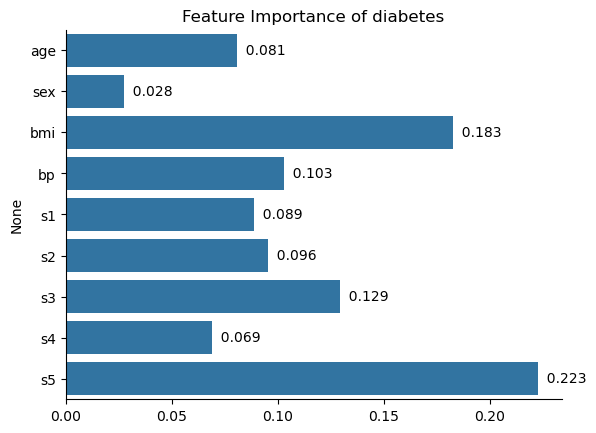

In [314]:
ax = sns.barplot(
    x=dt.feature_importances_,y=x_df.columns)

ax.bar_label(ax.containers[0],fmt='  %.3f')
plt.gca().spines[['right','top']].set_visible(False)
plt.title("Feature Importance of diabetes")
plt.show()

In [315]:
y_pred = dt.predict(x_test)

In [316]:
mat = metrics.confusion_matrix(y_test,y_pred,labels=['True','False'])

confusion_matrix는 ~ 하다.

In [317]:
pd.DataFrame(
    mat,columns=['diabetes_pred','normal_pred'],index=['diabetes_truth','normal_truth']
)

,diabetes_pred,normal_pred
diabetes_truth,0,0
normal_truth,0,0


raw_data 는 필요가 없다
ex) raw_data.xlsx 파일 참조

모델 하이퍼파라미터 설정

보고서에 소스코드, 캡처 X

하이퍼라미터는 estimator number = 1000 및 나머지는 기본값으로 설정하였습니다. 라고 설명을 해야한다.

이미지는 비율에 맞춰서 키우거나 줄인다